[[4]]


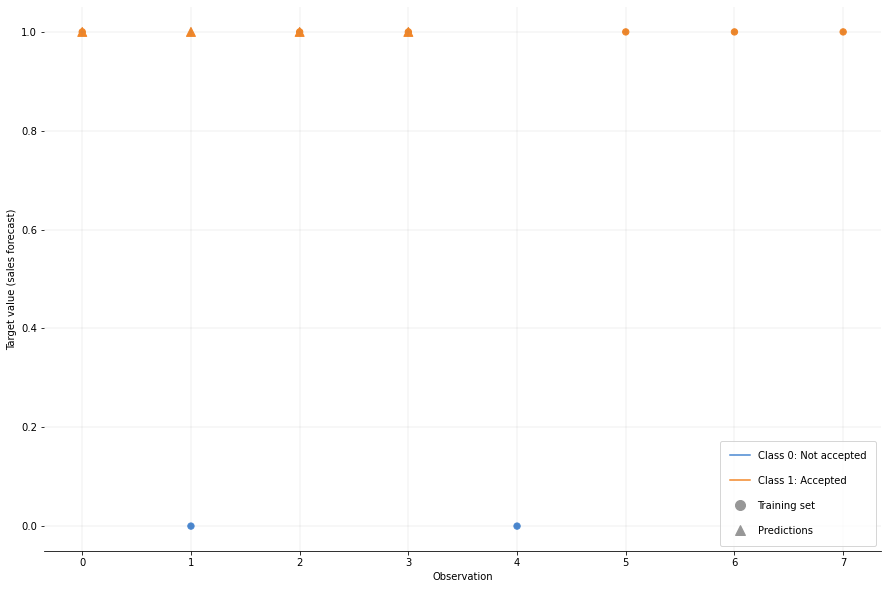

In [22]:
""" ########################

LOGISTIC REGRESSION USING SKLEARN

    Classify products into two categories based on the sales forecast accuracy.

    Questions:
    To which products is have to focus on when updating the sales forecast?
    On which products the sales forecast is least accurate?
    On which product I should double check the sales forecast?

    Steps for logistic regression
    1. Create x and y
    2. Create Train and Test set
    3. Train the model
    4. Make prediction
    5. Evaluate the model

########################### """

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

data = pd.DataFrame(pd.read_csv("logReg_testData.csv", sep="\;", decimal=",", engine="python"))
data.head()

# Cleaning the dataset
# Check null values/missing values
data.isnull().sum()

# Calculate metrics for evaluate planning accuracy
# MAD (Mean Absolute Deviation)
# MAPE (Mean Absolute Percent Error)
data["MAD"] = np.absolute(data["salesActual"]-data["salesForecast"])
data["MAPE"] = np.absolute(data["MAD"]/data["salesActual"]*100)

# Select only product A
data = data[data["product"] == "A"]

# Feature variables (independent variable)
x = data[["salesForecast"]].values
#x = data[["salesForecast", "MAD", "MAPE"]].values

# Target variable (dependent variable)
y = data["isAccepted"].values

# Create train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,
                                                            test_size=0.3,
                                                            random_state=100)

# Instantiate the model
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

# Evaluate performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

def plot_results(train_targets, predictions):
    fig, ax = plt.subplots(figsize=(15, 10))
    # removing all borders except bottom
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # adding major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    training_colors = ['#4786D1' if target <= 0 else '#F28627' for target in train_targets]
    prediction_colors = ['#4786D1' if target <= 0 else '#F28627' for target in predictions]
    train_set_len = len(train_targets)
    predictions_len = len(predictions)
    plt.scatter(np.arange(0, train_set_len), train_targets, color=training_colors, marker='o', s=[5 * train_set_len])
    plt.scatter(np.arange(0, predictions_len), predictions, color=prediction_colors, marker='^', s=[20 * predictions_len])
    ax.set_xlabel('Observation')
    ax.set_ylabel('Target value (sales forecast)')

    # Customizing symbols in the legend
    legend_items = [Line2D([0], [0], color='#4786D1', markersize=10), 
        Line2D([0], [0], color='#F28627', markersize=10),
        Line2D([0], [0], color='w', marker='o', markerfacecolor='#979797', markeredgecolor='#979797', markersize=10),
        Line2D([0], [0], color='w', marker='^', markerfacecolor='#979797', markeredgecolor='#979797', markersize=10)]
    # Adding some spacing between each legend row and padding
    ax.legend(handles=legend_items,
    labels=['Class 0: Not accepted', 'Class 1: Accepted', 'Training set', 'Predictions'],labelspacing=1.5, borderpad=1)
    
    plt.show()


plot_results(y_train, y_pred)



NameError: name 'plt' is not defined